<a href="https://colab.research.google.com/github/PrinceShamim022/Water_Quality_Assessment/blob/main/WaterQualityDataAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn import linear_model
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sma
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree
%matplotlib inline


In [2]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [152]:
!git clone https://github.com/PrinceShamim022/Water_Quality_Assessment.git

fatal: destination path 'Water_Quality_Assessment' already exists and is not an empty directory.


In [151]:
df.head(5) # Display the first 5 rows

,Sample ID,pH,Temperature,Turbidity,Dissolved Oxygen,Conductivity,Prediction of Conductivity,classification
0,1,7.25,23.1,4.5,7.8,342,345.425235,category1
1,2,7.11,22.3,5.1,6.2,335,327.187337,category1
2,3,7.03,21.5,3.9,8.3,356,337.325996,category1
3,4,7.38,22.9,3.2,9.5,327,358.772237,category2
4,5,7.45,20.7,3.8,8.1,352,344.984460,category2


In [78]:
df.shape

(500, 7)

In [64]:
df.duplicated().sum()

0

## Missing Values
By examining the missing values in the dataset, we can identify any gaps in the data.

In [83]:
# Check for missing values in the dataset
df.isna().sum()
# df.isnull().sum()

Sample ID                     0
pH                            0
Temperature                   0
Turbidity                     0
Dissolved Oxygen              0
Conductivity                  0
Prediction of Conductivity    0
dtype: int64

## Unique Values
Looking at the unique values in specific columns, we can gain insights into the distinct categories or levels within those columns.

In [153]:
print(df['pH'].unique())

[7.25 7.11 7.03 7.38 7.45 6.89 7.19 6.98 7.31 7.02 7.24 7.17 6.95 7.06
 7.48 6.92 7.3  7.13 7.01 6.83 7.34 7.16 7.39 7.27 7.09 7.15 7.07 7.22
 7.21 7.35 7.28 7.14 6.96 7.37 7.08 7.32 7.12 7.26 7.04 7.41 6.9  7.29
 6.94 7.36 7.18 7.05 7.33 7.23 7.2  7.   7.1 ]


## Summary Statistics
After calculating the summary statistics for the numeric columns in the dataset, we can observe the following:

The count of values in each column indicates that we have data for a certain number of samples.
The mean value gives us an idea of the average or central tendency of the numeric columns.
The standard deviation provides a measure of the dispersion or variability in the data.
The minimum and maximum values help us identify the range of values for each column.
The quartiles give us information about the distribution and spread of the data.

In [95]:
# print(df.info())
df.describe().T
df.describe([0.25, 0.75, 0.95,]).T
# df.info()
# df.describe()

,count,mean,std,min,25%,50%,75%,95%,max
Sample ID,500.0,250.50000,144.481833,1.0000,125.750000,250.500000,375.250000,475.050000,500.000000
pH,500.0,7.16114,0.107531,6.8300,7.080000,7.160000,7.250000,7.340000,7.480000
Temperature,500.0,22.05440,0.903123,20.3000,21.200000,22.200000,22.900000,23.300000,23.600000
Turbidity,500.0,4.16940,0.397492,3.1000,3.800000,4.200000,4.500000,4.700000,5.100000
Dissolved Oxygen,500.0,8.38220,0.822396,6.0000,7.800000,8.400000,9.100000,9.700000,9.900000
Conductivity,500.0,344.36200,13.038672,316.0000,333.000000,344.000000,355.000000,366.000000,370.000000
Prediction of Conductivity,500.0,344.36200,10.486990,310.7451,336.098914,344.390027,352.146408,360.320406,368.124846


In [10]:
df.rename(columns ={'Temperature (°C)':'Temperature','Turbidity (NTU)':'Turbidity',
                      'Dissolved Oxygen (mg/L)':'Dissolved Oxygen',
                      'Conductivity (µS/cm)':'Conductivity'},
            inplace=True)

 ## Data Types¶
Upon inspecting the data types of each column, we find that the dataset consists of a combination of different data types. This includes numeric columns (integers or floats) representing various measurements, as well as categorical columns (objects) that categorize the samples.

In [81]:
print(df.dtypes)

Sample ID                       int64
pH                            float64
Temperature                   float64
Turbidity                     float64
Dissolved Oxygen              float64
Conductivity                    int64
Prediction of Conductivity    float64
dtype: object


## Data Aggregation
By performing aggregations on the dataset, we can gain insights into relationships between variables.

In [86]:
# Perform data aggregation based on a categorical column
df.groupby('pH').mean()

,Sample ID,Temperature,Turbidity,Dissolved Oxygen,Conductivity,Prediction of Conductivity
pH,,,,,,
6.83,21.000000,22.500000,3.300000,6.100000,348.000000,310.745100
6.89,6.000000,23.600000,4.600000,7.200000,320.000000,331.237267
6.90,59.000000,22.500000,4.200000,6.000000,357.000000,315.814500
6.92,24.000000,21.550000,4.800000,6.550000,362.500000,321.927205
6.94,65.000000,23.200000,4.000000,6.600000,348.000000,323.377782
6.95,13.000000,22.300000,4.100000,6.400000,341.000000,320.055977
6.96,43.000000,22.900000,4.800000,6.500000,344.000000,325.856512
6.98,51.500000,22.000000,3.850000,7.900000,326.500000,333.139479
7.00,126.000000,22.300000,4.500000,6.300000,328.000000,322.323660


In [88]:
# Example: Calculate the average value of a numeric column grouped by a categorical column
avgpH = df.groupby('pH').mean()
print(avgpH)

       Sample ID  Temperature  Turbidity  Dissolved Oxygen  Conductivity  \
pH                                                                         
6.83   21.000000    22.500000   3.300000          6.100000    348.000000   
6.89    6.000000    23.600000   4.600000          7.200000    320.000000   
6.90   59.000000    22.500000   4.200000          6.000000    357.000000   
6.92   24.000000    21.550000   4.800000          6.550000    362.500000   
6.94   65.000000    23.200000   4.000000          6.600000    348.000000   
6.95   13.000000    22.300000   4.100000          6.400000    341.000000   
6.96   43.000000    22.900000   4.800000          6.500000    344.000000   
6.98   51.500000    22.000000   3.850000          7.900000    326.500000   
7.00  126.000000    22.300000   4.500000          6.300000    328.000000   
7.01  274.344828    21.403448   4.400000          7.513793    328.586207   
7.02  241.333333    21.738889   4.366667          7.677778    334.000000   
7.03  246.11

# ## Find Correlations

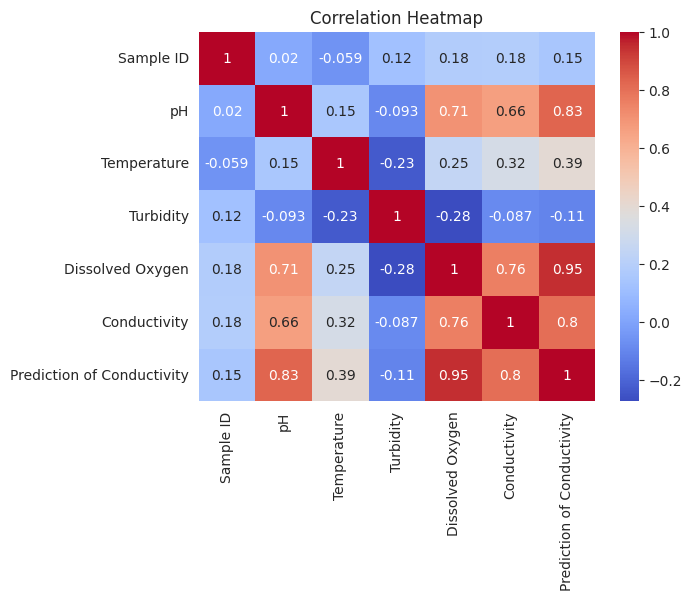

In [92]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [89]:
# See the dataset attributes/columns
print(df.columns)

Index(['Sample ID', 'pH', 'Temperature', 'Turbidity', 'Dissolved Oxygen',
       'Conductivity', 'Prediction of Conductivity'],
      dtype='object')


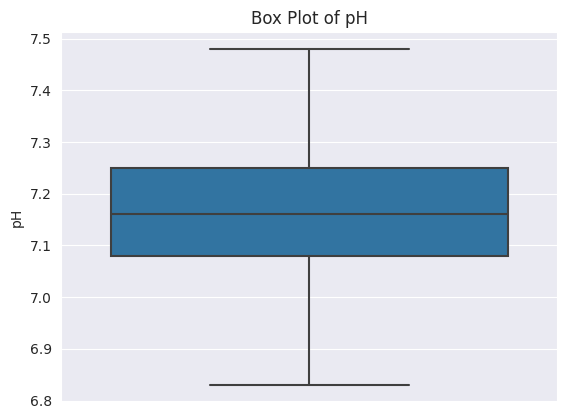

In [90]:
# Box plot of pH Level
sns.boxplot(data=df, y='pH')
plt.title('Box Plot of pH')
plt.show()

In [94]:
# Use a different visualization library || Plotly
import plotly.express as px

# Box plot of pH Level
fig = px.box(df, y='pH')
fig.update_layout(title='Box Plot of pH Level')
fig.show()

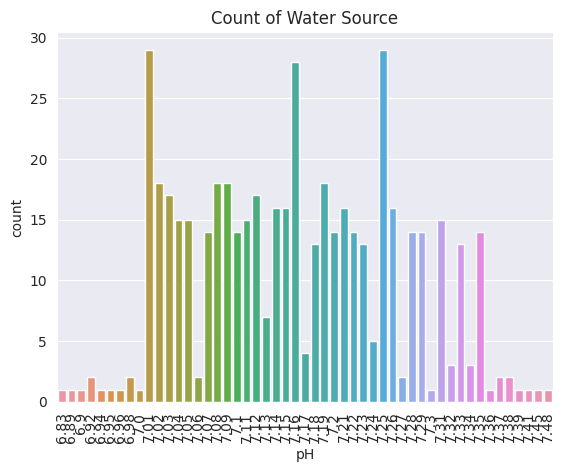

In [91]:
# Bar plot of Water Source
sns.countplot(data=df, x='pH')
plt.title('Count of Water Source')
plt.xticks(rotation=90)
plt.show()

## Histogram plot for Numeric Data/columns

In [102]:
num_cols = [col for col in df.columns
            if df[col].dtypes != 'O' and  col not in "Sample ID"]

In [104]:
def hist_for_nums(df, numeric_cols):
    col_counter = 0
    data = df.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")

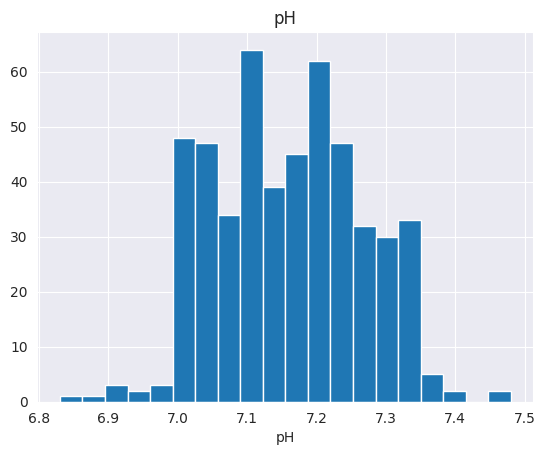

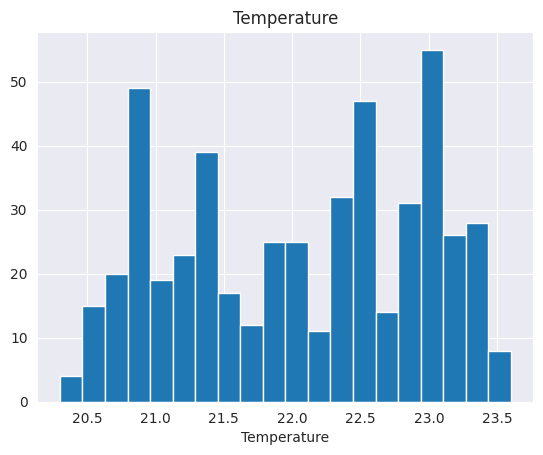

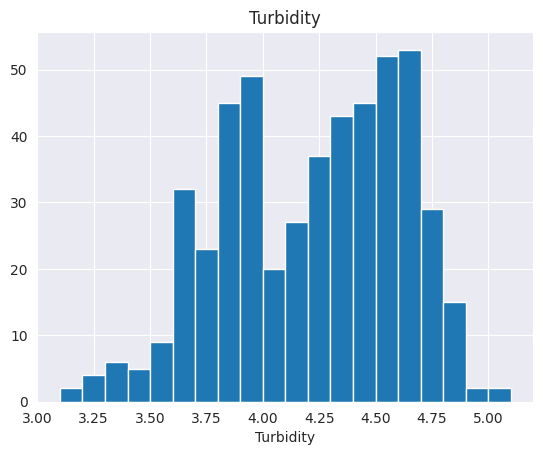

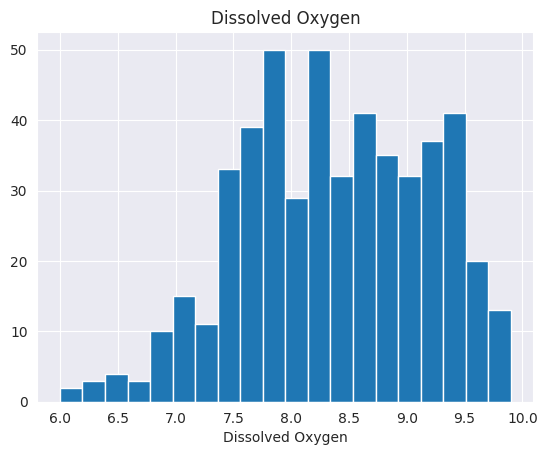

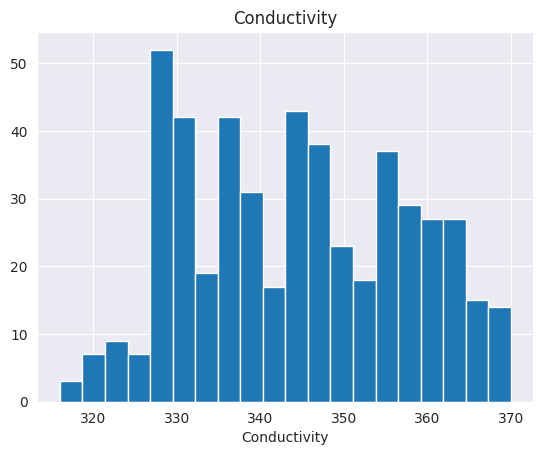

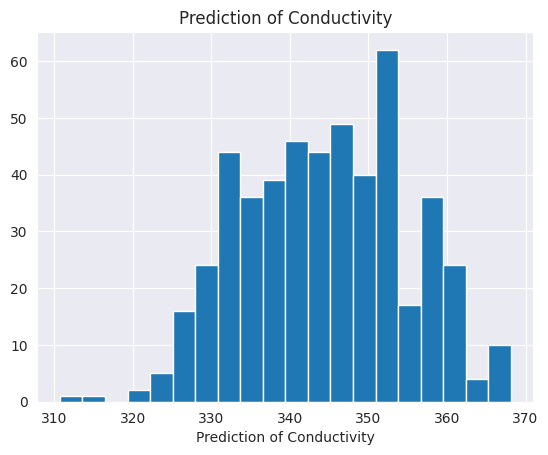

6 variables have been plotted


In [105]:
hist_for_nums(df, num_cols)

## Deal with Outliers
use 5 stats and IQR to delete outliers

In [106]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [107]:
outlier_thresholds(df, "pH")

(6.825, 7.505)

In [108]:
outlier_thresholds(df,"Temperature")

(18.65, 25.449999999999996)

In [110]:
# Marginal Plot
def marginalplot (dataframe):
    for col in dataframe[num_cols]:
        fig = px.histogram(
        df, x=col,
        marginal='box', nbins=50,
        color_discrete_map={0: '#D62728', 1: '#3366CC'},
        barmode='overlay')
        fig.update_layout(height=600, width=800,
        title_text='Water Quality')
        fig.show()

In [111]:
marginalplot(df)

In [114]:
df["Conductivity"].describe([0.25, 0.75, 0.95]).T

count    500.000000
mean     344.362000
std       13.038672
min      316.000000
25%      333.000000
50%      344.000000
75%      355.000000
95%      366.000000
max      370.000000
Name: Conductivity, dtype: float64

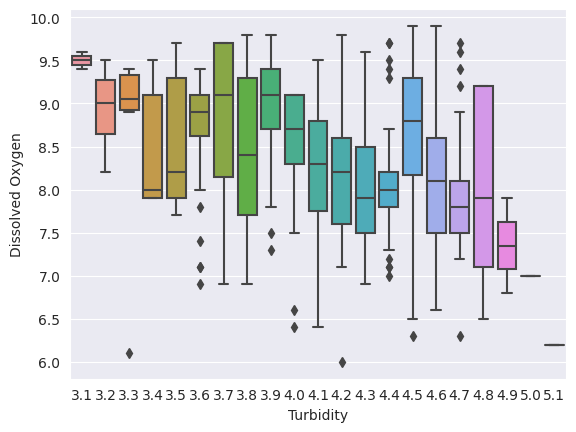

In [119]:
# boxplot
sns.boxplot(x="Turbidity",
            y="Dissolved Oxygen",data=df)
fig.show()

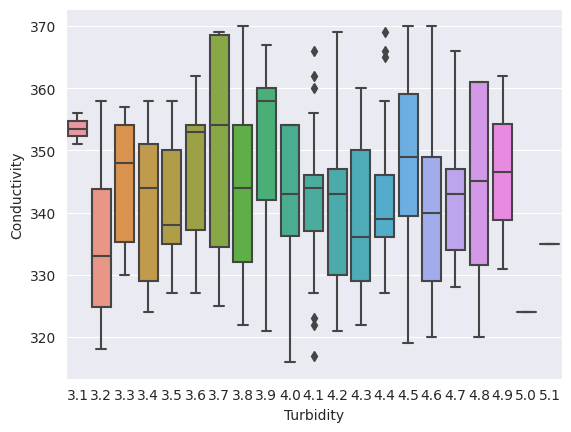

In [121]:
sns.boxplot(x="Turbidity", y="Conductivity",
            data=df)
fig.show()

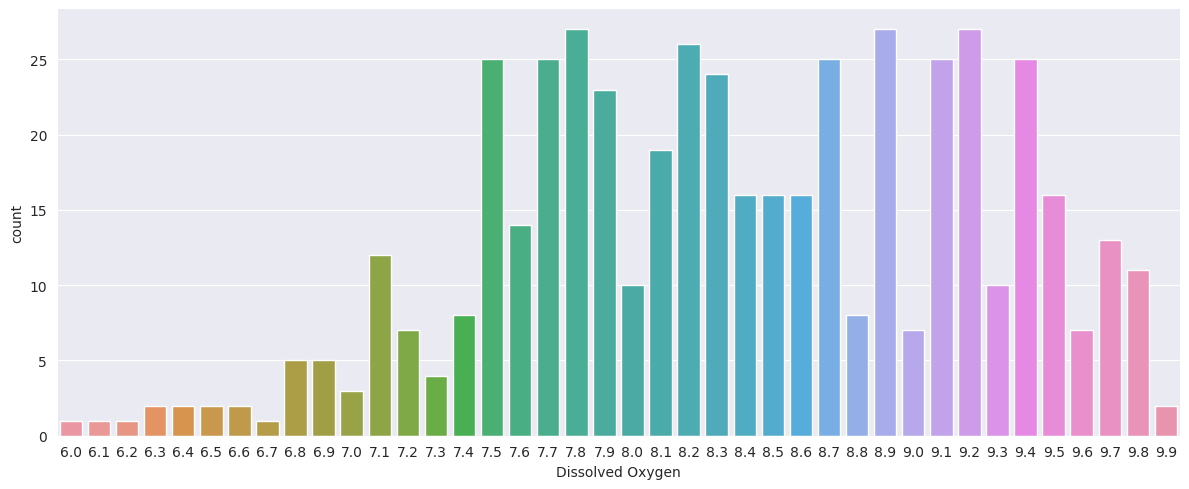

In [118]:
sns.catplot(data=df,x='Dissolved Oxygen',
            kind='count', aspect=2.4)
fig.show()

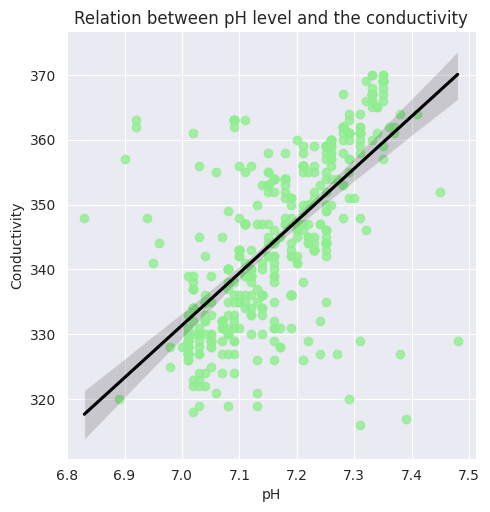

In [140]:
sns.lmplot(data=df,x="pH",y="Conductivity",scatter_kws={'color':'lightgreen'},line_kws={'color':'black'})
plt.title("Relation between pH level and the conductivity")
plt.show()

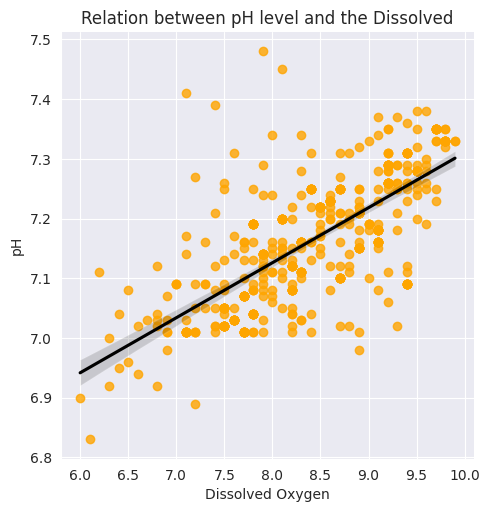

In [141]:
sns.lmplot(data=df,x="Dissolved Oxygen",y="pH",scatter_kws={'color':'orange'},line_kws={'color':'black'})
plt.title("Relation between pH level and the Dissolved")
plt.show()

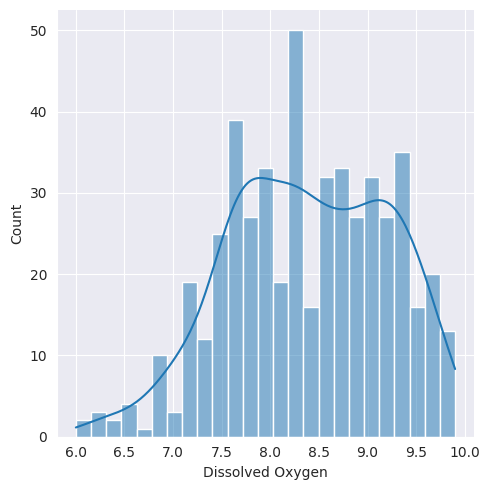

In [65]:
sns.displot(data=df, x="Dissolved Oxygen", kde=True, bins=25)
plt.show()

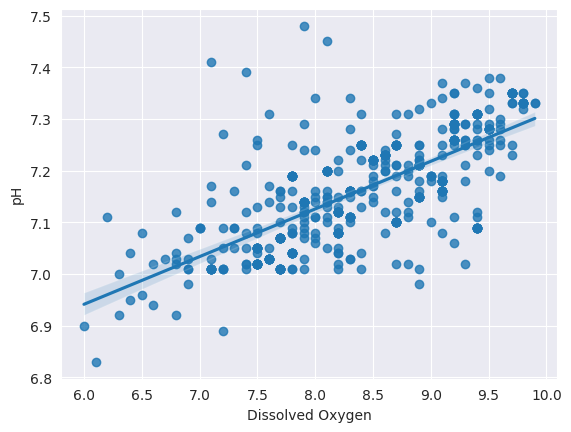

In [67]:
sns.regplot(data=df, y="pH", x="Dissolved Oxygen")
plt.show()

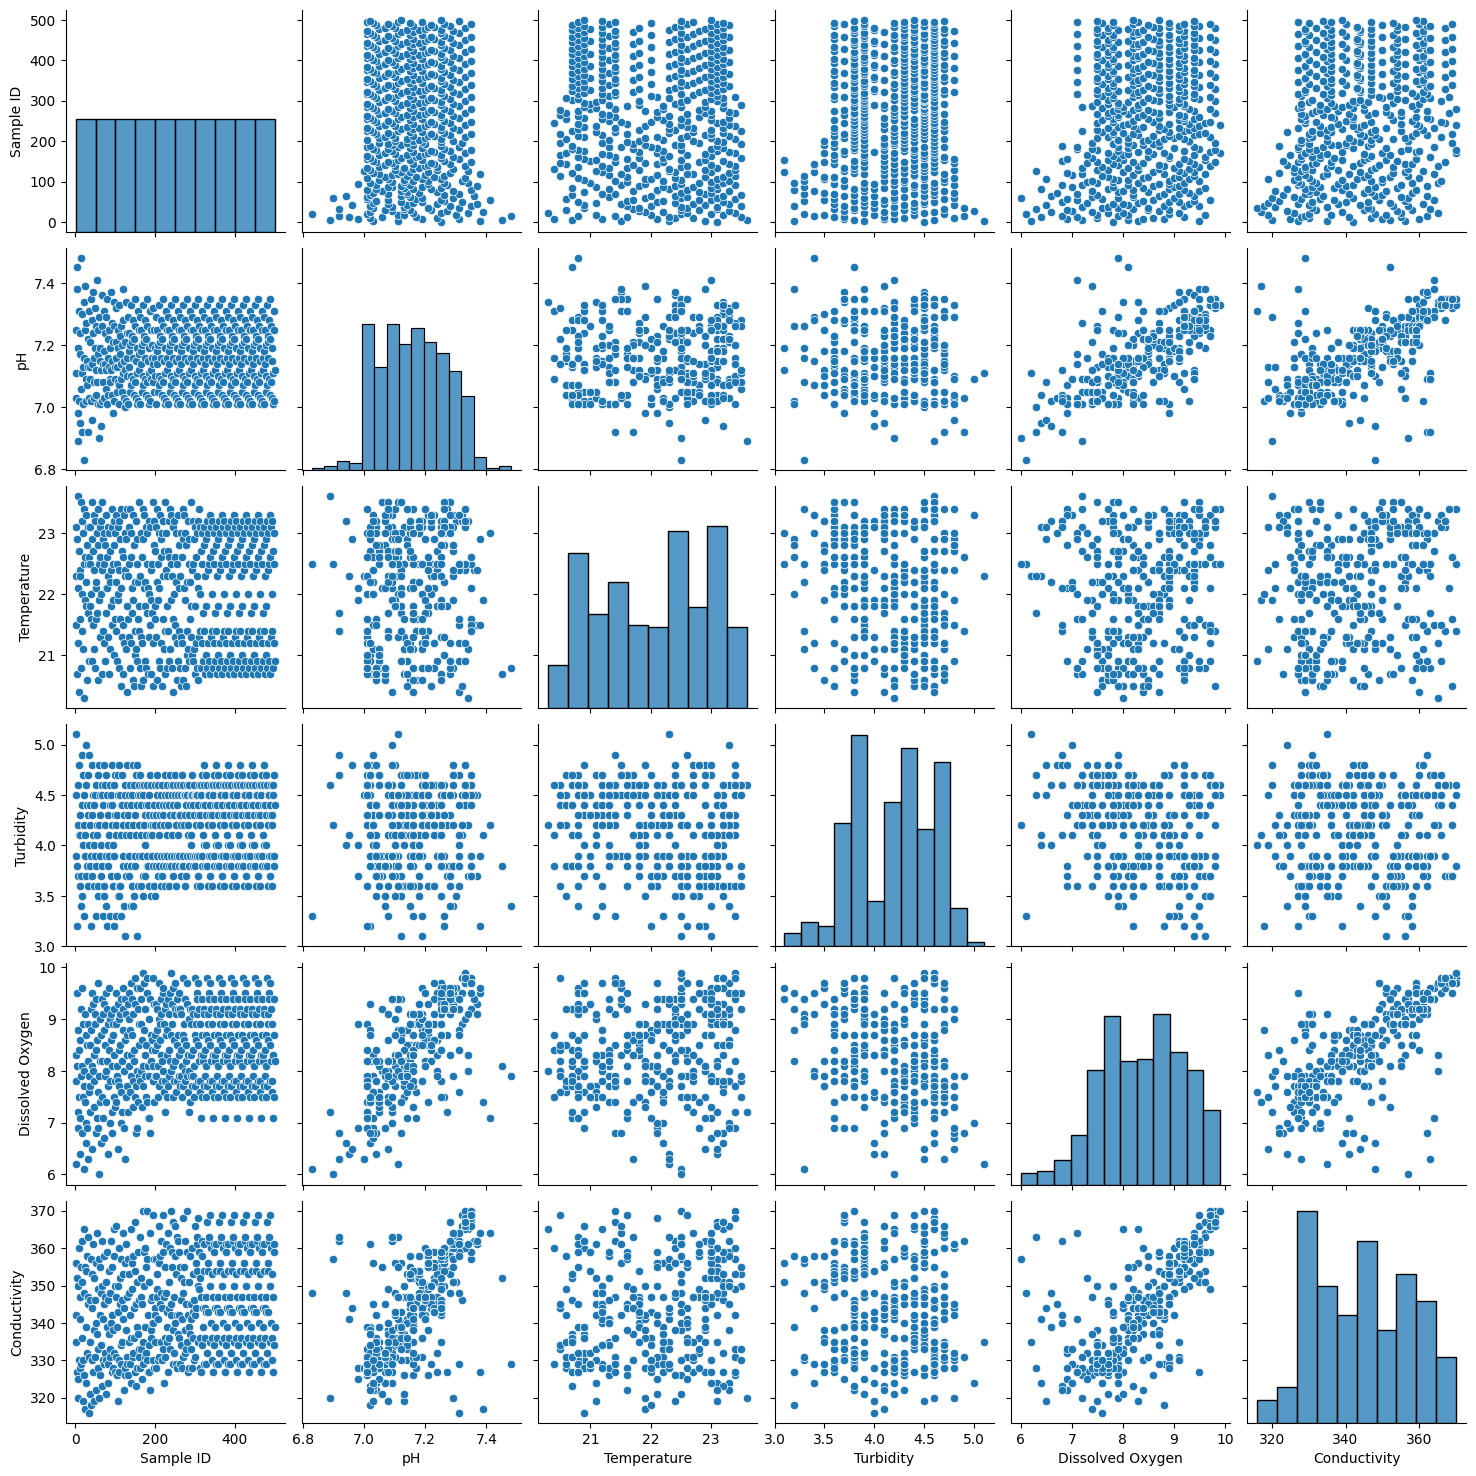

In [13]:
sns.pairplot(df)
plt.show()

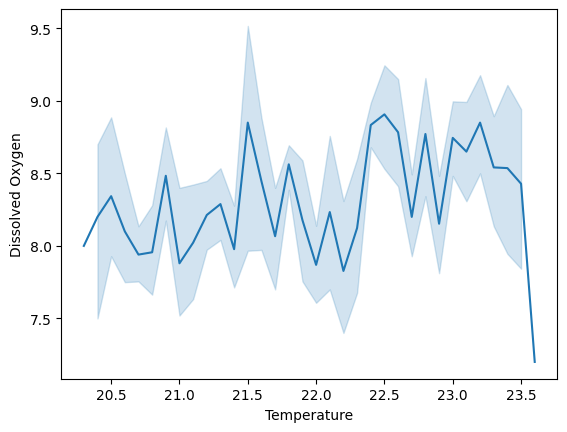

In [15]:
sns.lineplot(data=df,x='Temperature',
             y='Dissolved Oxygen')
plt.show()

In [22]:
lm = linear_model.LinearRegression()
lm.fit(df[['pH', 'Temperature',
                            'Turbidity',
                            'Dissolved Oxygen']],
        df['Conductivity'])

LinearRegression()

In [23]:
lm.intercept_

-9.4081493692712

In [24]:
lm.coef_

array([28.37130675,  2.41749122,  4.46858489,  9.38317072])

In [25]:
lm_predict = lm.intercept_ + lm.coef_
lm_predict

array([18.96315738, -6.99065815, -4.93956448, -0.02497865])

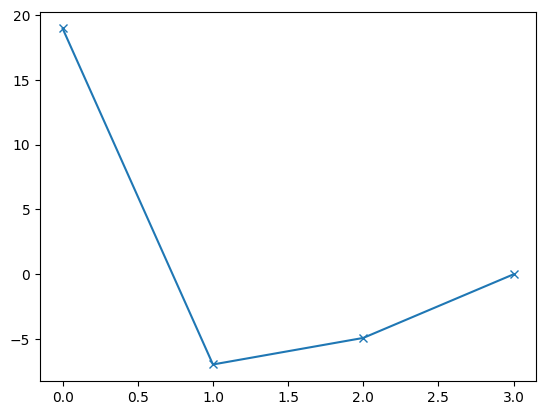

In [42]:
plt.plot(lm_predict, marker='x')
plt.show()

In [32]:
a = df['Temperature']
b = df['Dissolved Oxygen']

In [33]:
a = np.array(a)
b = np.array(b)

In [34]:
a = sma.add_constant(a)

In [35]:
model = sma.OLS(b, a).fit()

In [36]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     32.35
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           2.20e-08
Time:                        10:02:43   Log-Likelihood:                -595.47
No. Observations:                 500   AIC:                             1195.
Df Residuals:                     498   BIC:                             1203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4222      0.873      3.921      0.0

<Axes: xlabel='Temperature', ylabel='pH'>

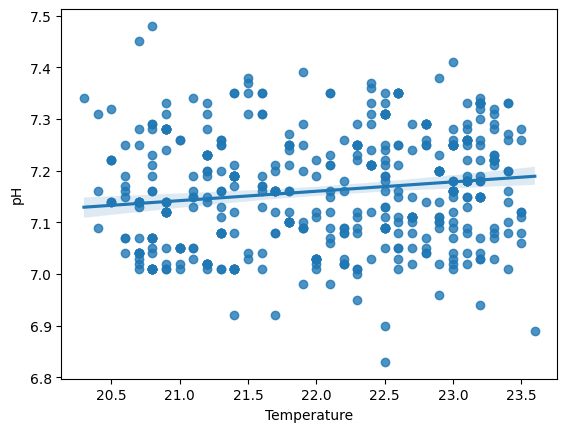

In [40]:
sns.regplot(df, x='Temperature', y='pH')

<Axes: xlabel='pH', ylabel='Count'>

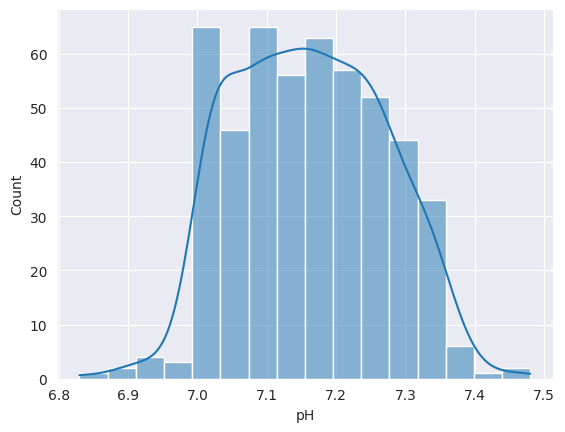

In [123]:
from pickle import TRUE
sns.set_style("darkgrid")
sns.histplot(df, x='pH', kde = TRUE)

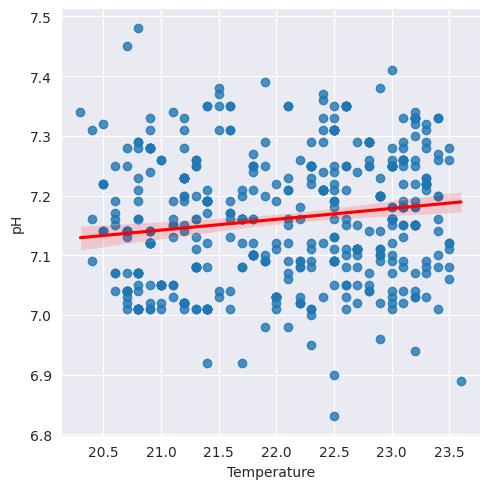

In [45]:
sns.lmplot(df, x='Temperature', y='pH', line_kws={'color':'red'})

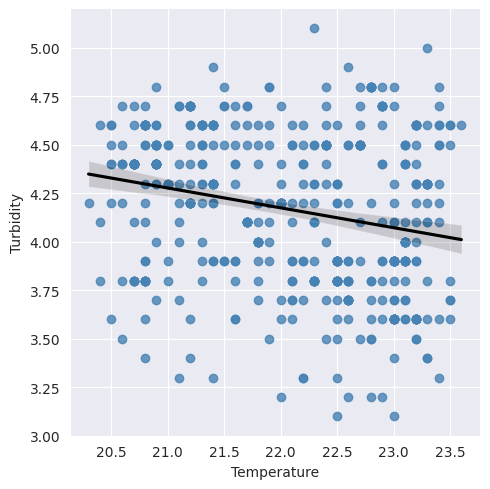

In [48]:
sns.lmplot(df, x='Temperature', y='Turbidity',
           scatter_kws={'color' : 'steelblue'},
           line_kws={'color' : 'black'})

## Using the Kmeans Model to classify the water sample into 3 category

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
StandardScaler(copy = True, with_mean = True, with_std = True)
sampled_scaler = scaler.transform(df)

In [128]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, random_state = 2023)
cluster = model.fit_predict(sampled_scaler)

In [129]:
level = pd.Series(cluster)

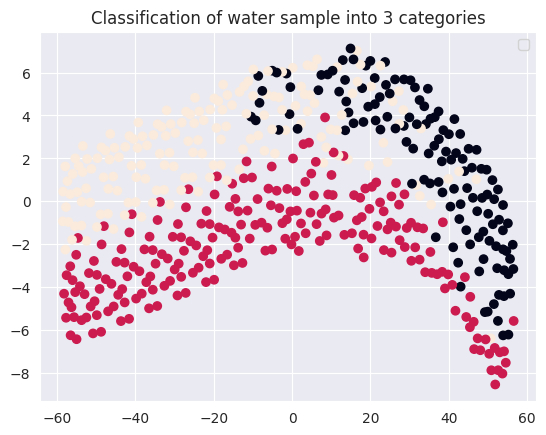

In [130]:
from sklearn.manifold import TSNE

model = TSNE()
transformed_model = model.fit_transform(df)

xs = transformed_model[:,0]
ys =transformed_model[:,1]

plt.scatter(xs,ys,c=level)
plt.title("Classification of water sample into 3 categories")
plt.legend()
plt.show()


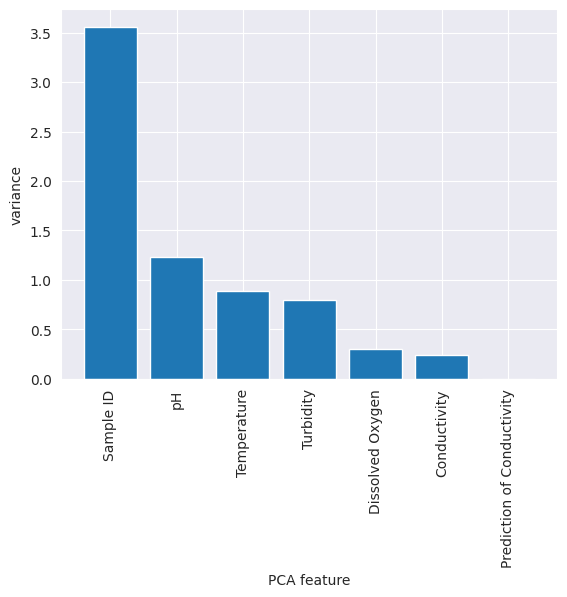

In [131]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(df)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features,df.columns)
plt.xticks(rotation=90)
plt.show()

In [133]:
df['classification'] = cluster
df.head(5)

,Sample ID,pH,Temperature,Turbidity,Dissolved Oxygen,Conductivity,Prediction of Conductivity,classification
0,1,7.25,23.1,4.5,7.8,342,345.425235,0
1,2,7.11,22.3,5.1,6.2,335,327.187337,0
2,3,7.03,21.5,3.9,8.3,356,337.325996,0
3,4,7.38,22.9,3.2,9.5,327,358.772237,1
4,5,7.45,20.7,3.8,8.1,352,344.984460,1


### Lets rename the sample categories based on the results

In [134]:
df['classification'] = df['classification'].fillna(0)
df['classification'] = df['classification'].astype("int")
df['classification'] = df['classification'].map({0:'category1',1:'category2',2:'category3'})
df['classification'].value_counts()

category2    215
category3    159
category1    126
Name: classification, dtype: int64

### check the distribution of category in the samples

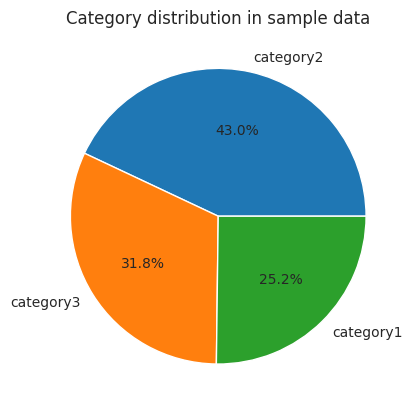

In [135]:
category = df['classification'].value_counts().reset_index(name='counts')
plt.pie(x=category['counts'],labels=category['index'],autopct='%1.1f%%')
plt.title("Category distribution in sample data")
plt.show()

<Figure size 1500x800 with 0 Axes>

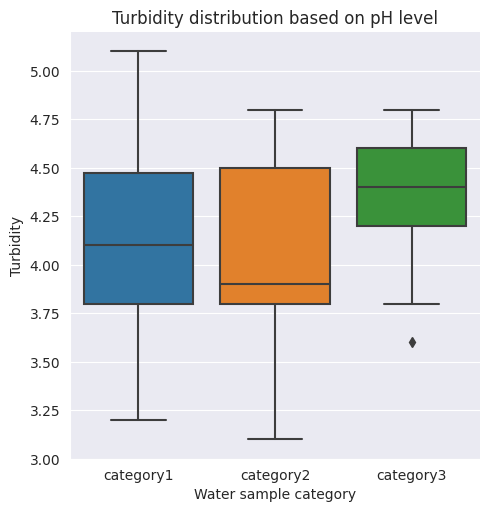

In [139]:
fig = plt.figure(figsize=(15,8))
sns.catplot(data=df, y="Turbidity", x="classification", kind='box')
plt.title("Turbidity distribution based on pH level")
plt.xlabel("Water sample category")
plt.show()

# Build a linear Model

In [49]:
a = df['Temperature']
b = df['Dissolved Oxygen']

In [51]:
features = ['Temperature', 'Dissolved Oxygen']
a_train = df[features]
a_test = df[features]
b_train = df['Dissolved Oxygen']

In [52]:
lm = linear_model.LinearRegression()
lm.fit(a_train, b_train)
prediction = lm.predict(a_test)

In [53]:
prediction

array([7.8, 6.2, 8.3, 9.5, 8.1, 7.2, 8.8, 6.9, 8.4, 7.5, 8.6, 7.1, 6.4,
       9.2, 7.9, 6.8, 8.1, 9.6, 7.5, 8.9, 6.1, 8. , 7.7, 9.1, 7.4, 6.6,
       8.7, 7. , 8.5, 6.9, 8.9, 6.3, 8.2, 7.6, 7.9, 8.5, 7.7, 7.2, 9.2,
       8.8, 9.5, 8.1, 6.5, 8. , 9.3, 7.8, 7.3, 8.3, 8.9, 9.1, 6.8, 9.4,
       8.4, 7.1, 8.6, 9.7, 7.6, 6.9, 6. , 7.9, 9. , 7.4, 8.2, 8.7, 6.6,
       9.4, 8.2, 7.5, 9.1, 7.1, 8.8, 6.7, 9.3, 7.9, 8.5, 8. , 9.5, 7.4,
       8.2, 9.2, 6.4, 7.7, 8.9, 8.4, 9.6, 7. , 9. , 7.8, 9.1, 8.6, 7.2,
       6.8, 8.1, 8.7, 8.9, 8.3, 7.5, 9.2, 7.3, 7.8, 8.9, 7.4, 9.5, 8.1,
       7.9, 9.3, 6.5, 7.8, 8.4, 9. , 7.7, 8.5, 9.1, 7.6, 9.4, 7. , 8.2,
       7.2, 9.6, 8.8, 9.2, 6.9, 8. , 8.6, 9.4, 6.3, 9.1, 7.5, 8.3, 7.7,
       8.7, 9.3, 7.2, 9. , 8.1, 9.5, 7.6, 8.8, 8.3, 9.7, 7.9, 8.7, 9.4,
       7.8, 9.1, 7.3, 8.4, 8.2, 9.8, 7.5, 9.3, 6.8, 7.7, 9.6, 8. , 6.9,
       9.2, 7.4, 8.9, 7.9, 8.5, 9.6, 7.8, 8.9, 8. , 9.4, 7.3, 8.6, 8.1,
       9.9, 7.7, 8.8, 9.7, 8.3, 9.2, 7.9, 8.5, 7.5, 9.8, 7.4, 9.

In [54]:
print(prediction.shape)

(500,)


In [55]:
submission = df[['Sample ID']]
submission

,Sample ID
0,1
1,2
2,3
3,4
4,5
...,...
495,496
496,497
497,498
498,499


In [56]:
submission['Conductivity'] = prediction

In [57]:
submission = df[['Sample ID', 'Turbidity', 'Temperature', 'Dissolved Oxygen']]
submission

,Sample ID,Turbidity,Temperature,Dissolved Oxygen
0,1,4.5,23.1,7.8
1,2,5.1,22.3,6.2
2,3,3.9,21.5,8.3
3,4,3.2,22.9,9.5
4,5,3.8,20.7,8.1
...,...,...,...,...
495,496,4.6,20.8,7.1
496,497,3.8,22.5,9.4
497,498,4.7,21.2,7.5
498,499,3.9,23.0,8.7


In [59]:
columns = ['pH', 'Temperature', 'Turbidity', 'Dissolved Oxygen']
a_train = df[columns]
a_test = df[columns]
b_train = df['Conductivity']

In [61]:
Regression = linear_model.LinearRegression()
Regression.fit(a_train, b_train)
predictions = Regression.predict(a_test)
predictions

array([345.42523531, 327.18733718, 337.3259963 , 358.7722368 ,
       344.98445953, 331.23726655, 347.17231884, 323.32776971,
       344.4427559 , 336.45846252, 350.06209798, 328.93934804,
       320.05597735, 350.5632546 , 342.41327975, 324.35723225,
       341.16210475, 359.50667217, 332.1364524 , 349.58957734,
       310.74509965, 341.74573618, 342.658748  , 353.7334607 ,
       340.95552655, 325.91114629, 347.71990859, 336.09708035,
       342.6657376 , 328.02028966, 352.55137219, 319.49717728,
       341.75222038, 337.69810644, 340.70055324, 344.58785453,
       338.29129123, 334.80906531, 355.09141723, 339.81460477,
       359.6198933 , 338.90714512, 325.85651164, 344.26372594,
       359.03656225, 337.063885  , 332.89839142, 339.94859688,
       357.97446369, 347.6796981 , 330.38316199, 353.18397756,
       338.34291707, 341.8141003 , 342.93672807, 358.05942741,
       336.12888556, 326.87478901, 315.81450046, 345.93799066,
       352.30161083, 329.61765223, 345.13262731, 343.94

In [62]:
df['Prediction of Conductivity'] = predictions
df

,Sample ID,pH,Temperature,Turbidity,Dissolved Oxygen,Conductivity,Prediction of Conductivity
0,1,7.25,23.1,4.5,7.8,342,345.425235
1,2,7.11,22.3,5.1,6.2,335,327.187337
2,3,7.03,21.5,3.9,8.3,356,337.325996
3,4,7.38,22.9,3.2,9.5,327,358.772237
4,5,7.45,20.7,3.8,8.1,352,344.984460
...,...,...,...,...,...,...,...
495,496,7.01,20.8,4.6,7.1,327,326.934531
496,497,7.31,22.5,3.8,9.4,361,357.562083
497,498,7.02,21.2,4.7,7.5,334,332.385367
498,499,7.25,23.0,3.9,8.7,359,350.947189


# Random Forest for Water Quality Dataset

In [68]:
y = df["Dissolved Oxygen"]

In [69]:
features = ["pH", "Temperature", "Turbidity", "Conductivity"]

In [70]:
X = df[features]
X.head(3)

,pH,Temperature,Turbidity,Conductivity
0,7.25,23.1,4.5,342
1,7.11,22.3,5.1,335
2,7.03,21.5,3.9,356


In [72]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 42)

In [73]:
model = RandomForestRegressor(random_state = 1)
model.fit(X, y)
val_predictions = model.predict(val_X)
mae = mean_absolute_error(val_predictions, val_y)
mse = mean_squared_error(val_predictions, val_y)
r2 = r2_score(val_predictions, val_y)

In [74]:
print("Validation MAE for Random Forest Model: {:,f}".format(mae))
print("Validation MSE for Random Forest Model: {:,f}".format(mse))
print("Validation R2 for Random Forest Model: {:,f}".format(r2))

Validation MAE for Random Forest Model: 0.083464
Validation MSE for Random Forest Model: 0.024441
Validation R2 for Random Forest Model: 0.958370


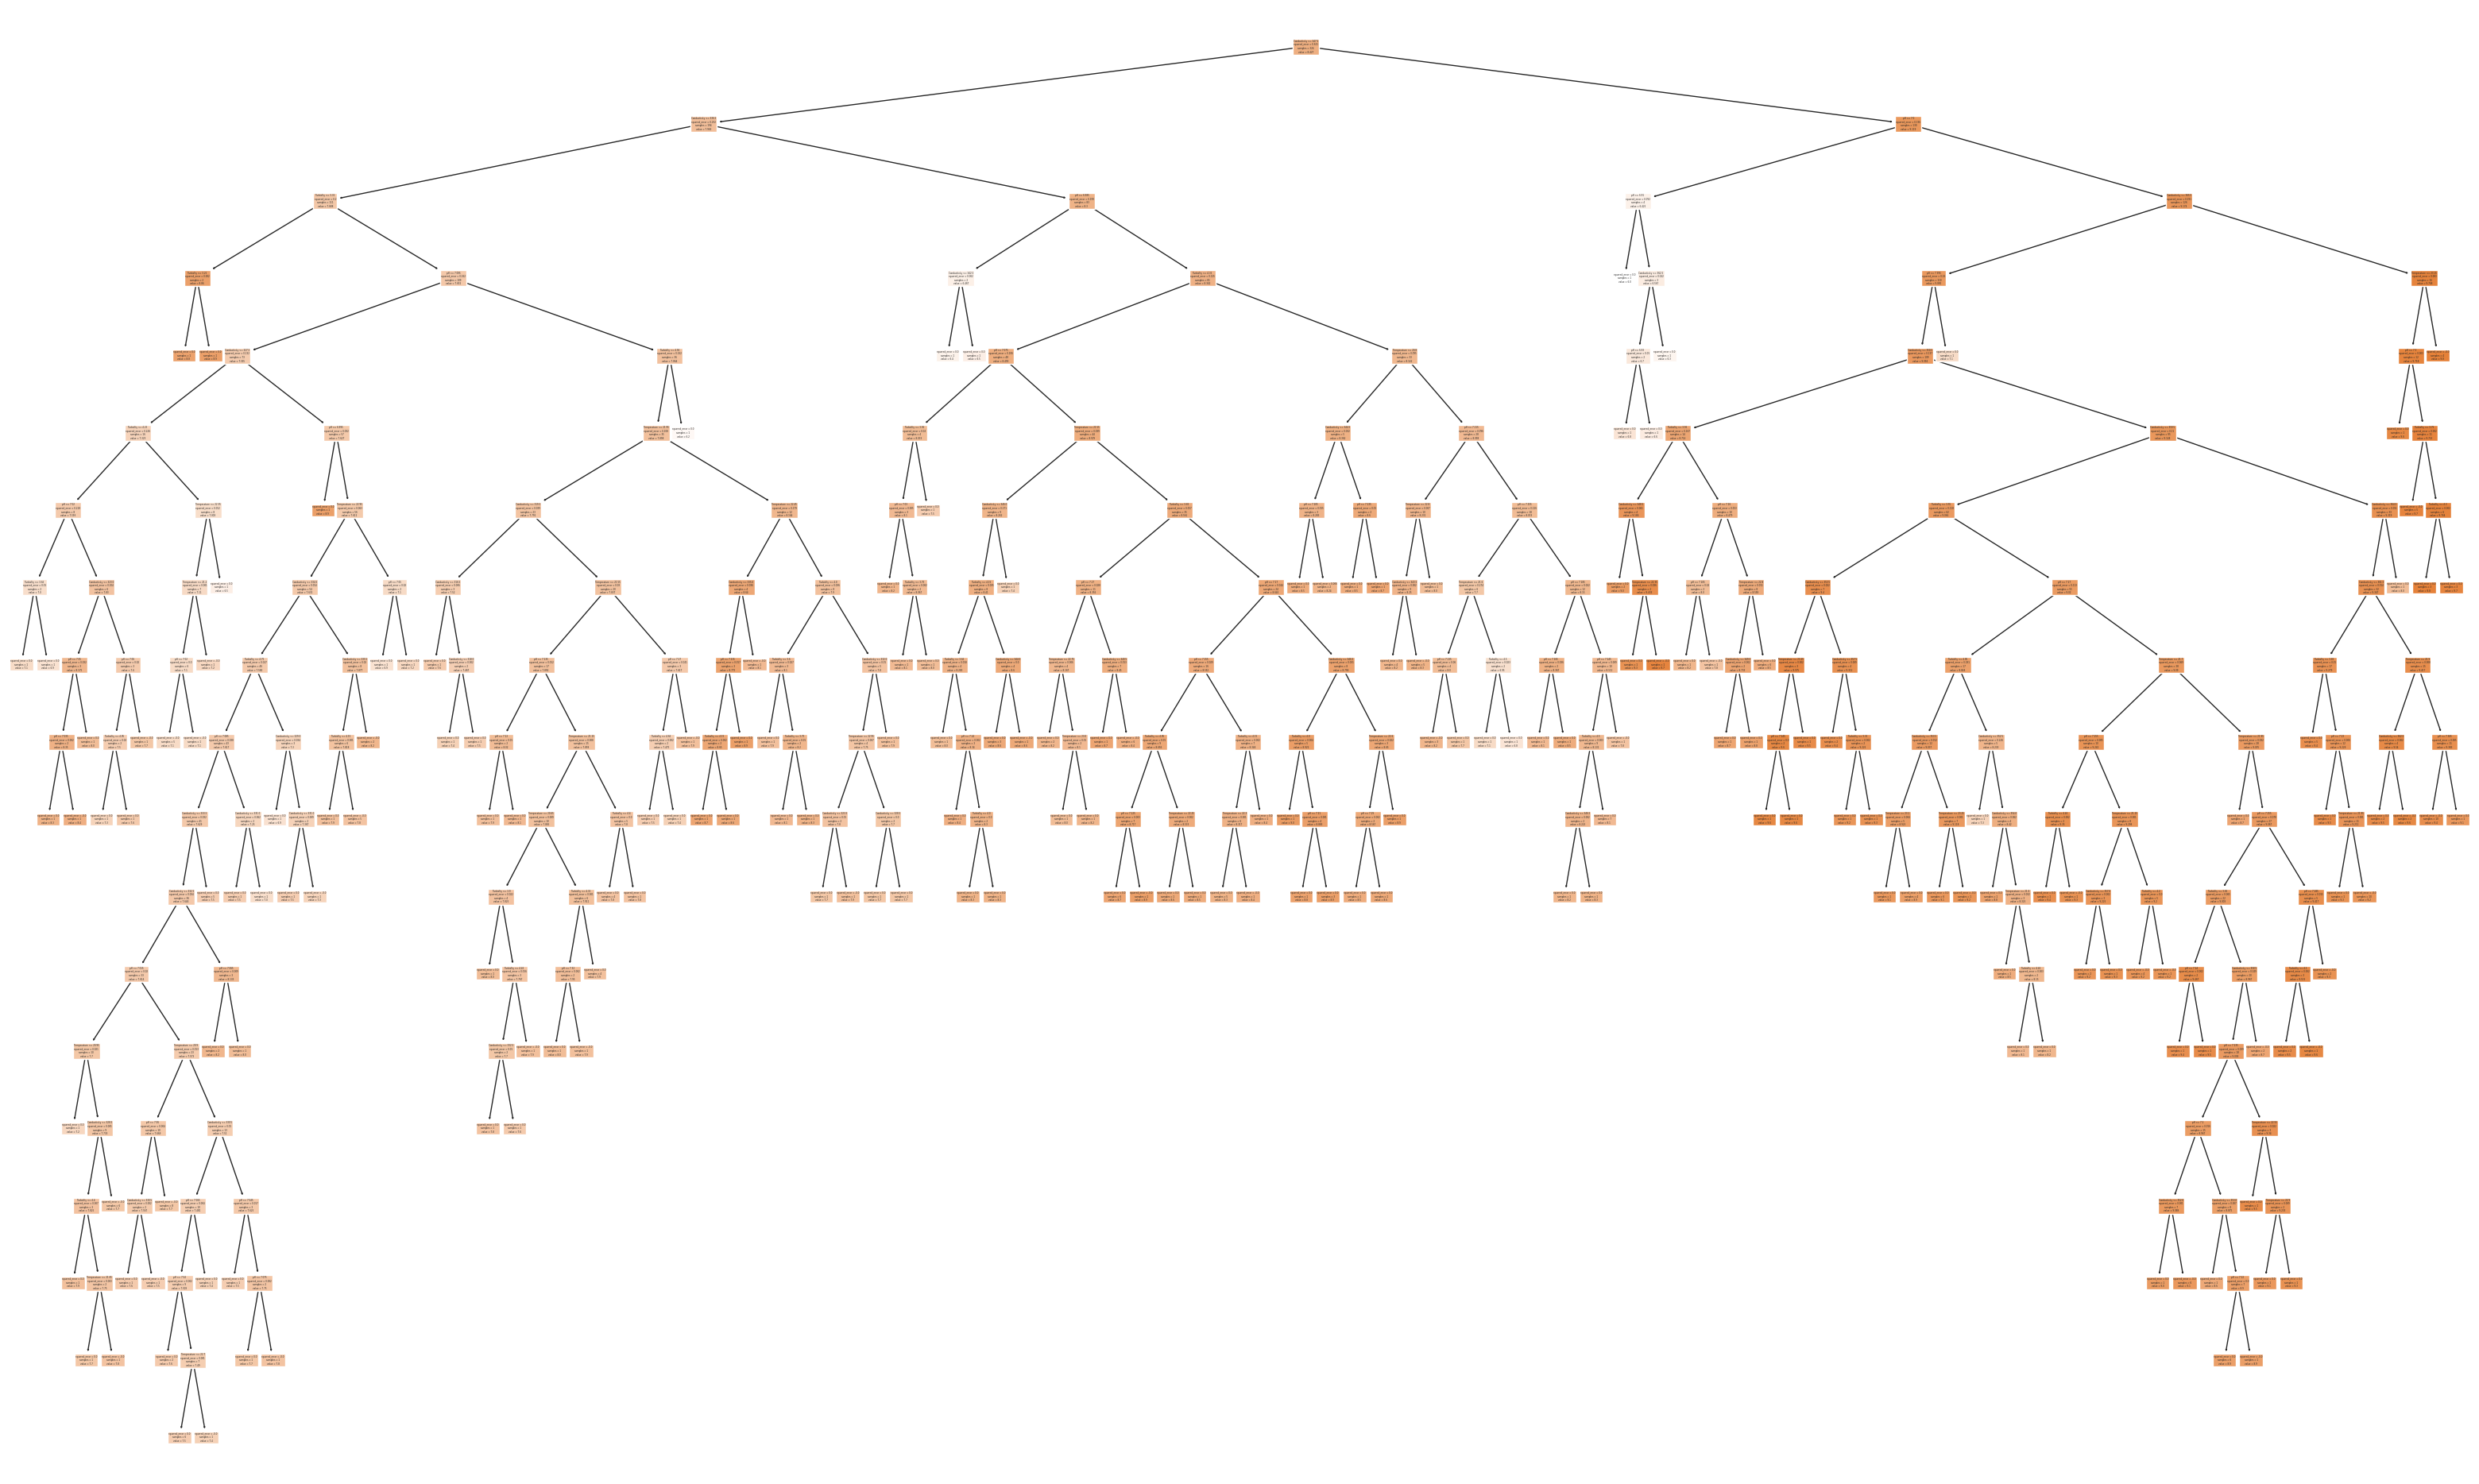

In [75]:
plt.figure(figsize=(40, 24))
plot_tree(model.estimators_[0], feature_names=features, filled=True)
plt.savefig("decision_tree.png", format="png")
plt.show()